                                   OUTLIERS
Outliers are observations (or datapoints) that are distant or abnormal from other observations.
Outliers can modify the final results. Hence the results may not be accurate. We have to treat
the outliers to get accurate results. 

Causes of outliers
1. Incorrect Entry: When typing data, the operator would have typed 000 instead of 1000.
2. Mis-reporting: Intentionally reporting wrong data. For example, a boy exaggerating his salary
in a matrimony site.
3. Sampling error: While measuring heights of Bengalis, we might have taken heights of some
Punjabis in the sample.
4. Exceptional but true value: Sometimes, the outlier may be correct but abnormal. For
example, persons smoking cigarettes per day. Generally people smoke 2 to 3 cigars but there
my be a person who is smoking 20 cigars. 

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("E:/ppts/machine learning/2-outlier/Solid_Waste_Generation___Recycling.csv")

In [3]:
data

,Year,Agricultural Organics,Aluminum Cans,Anti-freeze,Appliances/White Goods,"Ash, Sand & Dust used in Asphalt Production",Asphalt/Concrete,Batteries - Auto Lead Acid,Cardboard,Carpet & Pad,...,Waste Types Excluded from Recovery Rate,All Other Waste Types,Total Solid Waste Disposed (recoverable portion),All Solid Waste Disposal,Solid Waste Generated (recoverable portion),Overall Waste Generated (recoverable and non-recoverable),Material Recovery Rate,Population,Solid Waste Generated (pounds/person/day),Material Reovered (pounds/person/day)
0,2000,0,17944,2475,35427,10000,893218,10757,495470,97,...,549239.00,2515427.00,6.577102e+06,7126341,10463584,11012823,37.14,5894100,10.238075,3.613069
1,2001,0,12540,4157,39180,12333,1116871,16297,491230,820,...,1192376.00,2838771.00,6.257801e+06,7450177,10524608,11716984,40.54,5974900,10.745394,3.912997
2,2002,0,12718,4506,43833,290,1451959,12158,417534,148,...,1343941.00,2724337.00,6.084275e+06,7428216,10998676,12342617,44.68,6041700,11.193998,4.457061
3,2003,0,17608,4722,53353,10576,1600288,18780,430750,258,...,1350013.00,2666863.00,6.122052e+06,7472065,11353874,12703887,46.08,6098300,11.414713,4.700903
4,2004,0,16010,8050,56920,40409,2002171,25518,535662,304,...,2557428.00,4153915.00,6.526087e+06,9083515,12760061,15317489,48.86,6167800,13.608004,5.538241
5,2005,0,15441,8767,47302,14588,1783418,28903,565698,186,...,2736151.00,5355491.00,7.696424e+06,10432575,14758169,17494320,47.85,6256400,15.321797,6.184786
6,2006,0,14951,7507,49796,4008,2295278,25414,570802,897,...,1689840.00,4164837.00,7.760714e+06,9450554,15442903,17132743,49.75,6375600,14.724582,6.602388
7,2007,0,14005,7055,44667,2521,2089972,25734,555757,1193,...,1810580.00,4557764.00,8.082291e+06,9892871,15372234,17182814,47.42,6488000,14.511776,6.156734
8,2008,31800,12842,6586,43401,0,1510051,25219,569688,3297,...,1634267.82,4154879.40,7.516909e+06,9151177,14309506,15943774,47.47,6587600,13.261756,5.649965
9,2009,45431,21098,5194,39777,344,2186429,21493,491266,3317,...,1550645.32,3039032.92,6.126660e+06,7677305,13564327,15114972,54.83,6668200,12.420408,6.111746


# outliers can be detected in 2 ways (there are many ways)
# 1 Visual representation and 
#2. IQR (Inter Quartile Range)

Text(0.5, 1.0, 'ALUMINUM CANS OF RECYCLE')

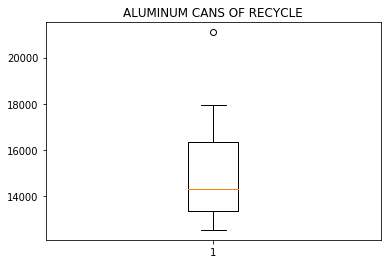

In [5]:
plt.boxplot(data['Aluminum Cans'])
plt.title('ALUMINUM CANS OF RECYCLE')

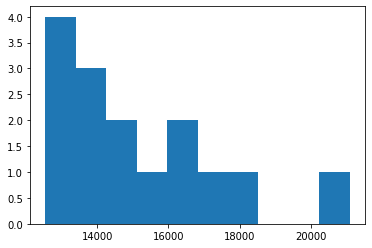

In [6]:
plt.hist(data['Aluminum Cans'])
plt.show()

##AS WE CAN SEE THE  FROM THE ABOVE PLOTS THE OUTLIER IS AT 2100


In [9]:
#CALCULATE IQR
q3=data['Aluminum Cans'].quantile(0.75)
q3

16344.5

In [10]:
q1=data["Aluminum Cans"].quantile(0.25)
q1

13375.0

In [11]:
iqr=q3-q1
iqr

2969.5

In [12]:
#calculate iqr values
ul=q3+(iqr*1.5)
ll=q1-(iqr*1.5)

In [13]:
print(ul,ll)

20798.75 8920.75


In [16]:
# eliminate values not in the range of ul - ll using indexing method

true_index = (ll <data['Aluminum Cans'].values) & \
 (data['Aluminum Cans'].values<ul)
true_index


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True])

In [17]:
data1 = data['Aluminum Cans'][true_index]
data1

0     17944
1     12540
2     12718
3     17608
4     16010
5     15441
6     14951
7     14005
8     12842
10    13655
11    13115
12    13635
13    16679
14    14309
Name: Aluminum Cans, dtype: int64

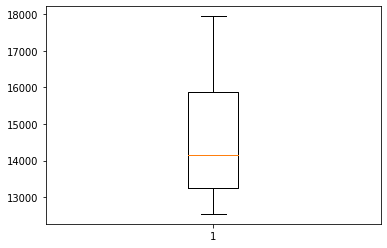

In [18]:
plt.boxplot(data1)
plt.show()


In [19]:
mid = np.median(data['Aluminum Cans'][true_index])
mid

14157.0

In [20]:
false_index = ~ true_index
data['Aluminum Cans'].values[false_index] = mid



In [21]:
data

,Year,Agricultural Organics,Aluminum Cans,Anti-freeze,Appliances/White Goods,"Ash, Sand & Dust used in Asphalt Production",Asphalt/Concrete,Batteries - Auto Lead Acid,Cardboard,Carpet & Pad,...,Waste Types Excluded from Recovery Rate,All Other Waste Types,Total Solid Waste Disposed (recoverable portion),All Solid Waste Disposal,Solid Waste Generated (recoverable portion),Overall Waste Generated (recoverable and non-recoverable),Material Recovery Rate,Population,Solid Waste Generated (pounds/person/day),Material Reovered (pounds/person/day)
0,2000,0,17944,2475,35427,10000,893218,10757,495470,97,...,549239.00,2515427.00,6.577102e+06,7126341,10463584,11012823,37.14,5894100,10.238075,3.613069
1,2001,0,12540,4157,39180,12333,1116871,16297,491230,820,...,1192376.00,2838771.00,6.257801e+06,7450177,10524608,11716984,40.54,5974900,10.745394,3.912997
2,2002,0,12718,4506,43833,290,1451959,12158,417534,148,...,1343941.00,2724337.00,6.084275e+06,7428216,10998676,12342617,44.68,6041700,11.193998,4.457061
3,2003,0,17608,4722,53353,10576,1600288,18780,430750,258,...,1350013.00,2666863.00,6.122052e+06,7472065,11353874,12703887,46.08,6098300,11.414713,4.700903
4,2004,0,16010,8050,56920,40409,2002171,25518,535662,304,...,2557428.00,4153915.00,6.526087e+06,9083515,12760061,15317489,48.86,6167800,13.608004,5.538241
5,2005,0,15441,8767,47302,14588,1783418,28903,565698,186,...,2736151.00,5355491.00,7.696424e+06,10432575,14758169,17494320,47.85,6256400,15.321797,6.184786
6,2006,0,14951,7507,49796,4008,2295278,25414,570802,897,...,1689840.00,4164837.00,7.760714e+06,9450554,15442903,17132743,49.75,6375600,14.724582,6.602388
7,2007,0,14005,7055,44667,2521,2089972,25734,555757,1193,...,1810580.00,4557764.00,8.082291e+06,9892871,15372234,17182814,47.42,6488000,14.511776,6.156734
8,2008,31800,12842,6586,43401,0,1510051,25219,569688,3297,...,1634267.82,4154879.40,7.516909e+06,9151177,14309506,15943774,47.47,6587600,13.261756,5.649965
9,2009,45431,14157,5194,39777,344,2186429,21493,491266,3317,...,1550645.32,3039032.92,6.126660e+06,7677305,13564327,15114972,54.83,6668200,12.420408,6.111746


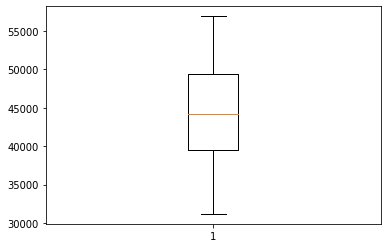

In [23]:
plt.boxplot(data["Appliances/White Goods"])
plt.show()

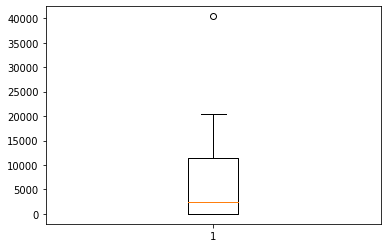

In [24]:
plt.boxplot(data["Ash, Sand & Dust used in Asphalt Production"])
plt.show()

In [25]:
q3=data["Ash, Sand & Dust used in Asphalt Production"].quantile(0.75)
q3

11454.5

In [26]:
q1=data["Ash, Sand & Dust used in Asphalt Production"].quantile(0.25)
q1

0.0

In [27]:
iqr=q3-q1
iqr

11454.5

In [29]:
ul=q3+(iqr*1.5)
ll=q1-(iqr*1.5)
print(ul,ll)

28636.25 -17181.75
